<h1 align="center"><strong>Tarea 02 - Filtros en el dominio de Fourier</strong></h1>

- Autor: [Renzo Guerrero Huayta](https://github.com/renzoguerrero17)
- Problemas extraídos del curso Fundamentos del procesamiento de imágenes de la Universidad Católica de Chile.

## 1.Enunciado

El objetivo de esta tarea es realizar de manera individual un programa que pueda filtrar imagenes ruidosas usando filtros en el dominio de Fourier. En esta carpeta se encuentran 5 fotografías ruidosas en blanco y negro, que deben ser leídas por un programa y procesadas para filtrar el ruido.

Se debe realizar un programa que basandose en el espectro de frecuencias en 2D logre eliminar el ruido periodico de las imagenes. La entrada del programa es la imagen, la salida es la imagen filtrada. El programa debe ser el mismo para cada imagen, sin embargo, los parametros pueden ser distintos y pueden ser fijados manualmente para cada una de las imagenes. Con este fin disene una funcion que se llame FiltroTarea2 que reciba como entrada la imagen ruidosa 'X' y los n parametros p1, p2, ... pn, de esta manera se ejecuta Y = FiltroTarea2(X,p1,p2,..,pn) para obtener la imagen de salida 'Y'. En la tarea se debe especificar cuales son los parametros para cada una de las imagenes.

## 2.Solución

### 2.1.Visualización

In [1]:
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import plotly.graph_objects as go

In [2]:
os.chdir(r"C:\Users\titos\Github\Procesamiento Imagenes\Tareas\imagenes")

In [3]:
J1 = mpimg.imread('J1.png')
J2 = mpimg.imread('J2.png')
J3 = mpimg.imread('J3.png')
J4 = mpimg.imread('J4.png')
J5 = mpimg.imread('J5.png')

(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)


In [4]:
select_image = IntSlider(min = 1, max = 5, description='Imagen:', continuous_update = False)

In [5]:
def plot_image(image):
    plt.figure(figsize=(8,8))
    if image == 1:
        plt.imshow(J1, cmap='gray')
    elif image == 2:
        plt.imshow(J2, cmap='gray')
    elif image == 3:
        plt.imshow(J3, cmap='gray')
    elif image == 4:
        plt.imshow(J4, cmap='gray')
    elif image == 5:
        plt.imshow(J5, cmap='gray')
    plt.show()

In [6]:
interactive(plot_image, image = select_image)

interactive(children=(IntSlider(value=1, continuous_update=False, description='Imagen:', max=5, min=1), Output…

### 2.2.Función 

In [4]:
def FiltroTarea2(imagen,*args):
    J1 = mpimg.imread(imagen)
    f = np.fft.fft2(J1)

    # FFTSHIFT
    fshift = np.fft.fftshift(f)
    Fourier = np.fft.fftshift(f)

    # Modulo
    Fourier = np.log(np.abs(Fourier) + 1)
    
    # Colocamos los puntos en cero--> Filtro de Notch
    if len(args)>1:
        for j in args:
            fshift[j[0]:j[1],j[2]:j[3]] = 0
    
    elif len(args) == 1:
        aux = args[0]
        #print(args[0])
        for j in aux:
            fshift[j[0]:j[1],j[2]:j[3]] = 0

    filtro = np.log(np.abs(fshift) + 1)
    
    # Transformada inversa de Fourier
    
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    
    # Grafica

    plt.figure(1,figsize=(15,15))
    
    plt.subplot(1, 2, 1)
    plt.title('Imagen original',fontsize = 12)
    plt.imshow(J1,cmap = 'gray')
    
    plt.subplot(1, 2, 2)
    plt.title('Imagen final',fontsize = 12)
    plt.imshow(img_back,cmap = 'gray')
    plt.show()

### 2.3.Pruebas

#### Imagen J1

In [160]:
### Puntos ###
pto1Yi,pto1Yd,pto1Xi,pto1Xd = 425,445,328,348
pto2Yi,pto2Yd,pto2Xi,pto2Xd = 355,375,452,472
pto3Yi,pto3Yd,pto3Xi,pto3Xd = 500,520,225,245
pto4Yi,pto4Yd,pto4Xi,pto4Xd = 285,305,560,580
pto5Yi,pto5Yd,pto5Xi,pto5Xd = 390,410,220,240
pto6Yi,pto6Yd,pto6Xi,pto6Xd = 390,410,560,580
pto7Yi,pto7Yd,pto7Xi,pto7Xd = 390,410,160,180
pto8Yi,pto8Yd,pto8Xi,pto8Xd = 390,410,620,640
pto9Yi,pto9Yd,pto9Xi,pto9Xd = 0,800,367,372
pto10Yi,pto10Yd,pto10Xi,pto10Xd = 0,800,423,433
pto11Yi,pto11Yd,pto11Xi,pto11Xd =345,355,0,800
pto12Yi,pto12Yd,pto12Xi,pto12Xd = 445,455,0,800
pto13Yi,pto13Yd,pto13Xi,pto13Xd = 355,365,0,800
pto14Yi,pto14Yd,pto14Xi,pto14Xd = 435,445,0,80

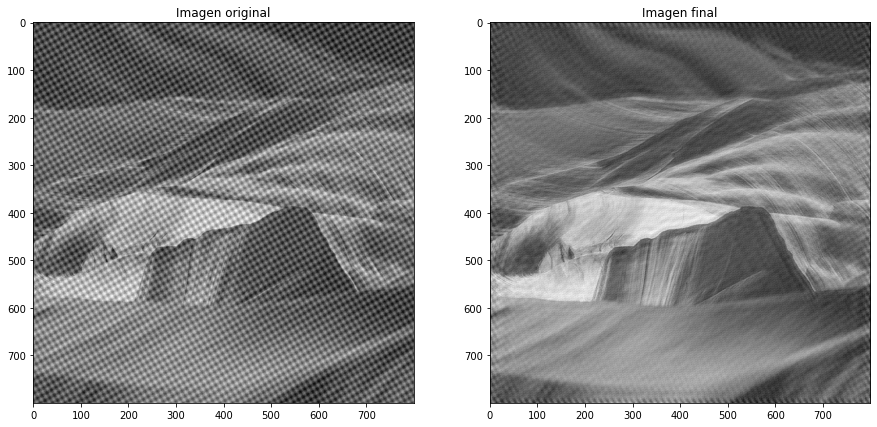

In [161]:
FiltroTarea2('J1.png',
             [pto1Yi,pto1Yd,pto1Xi,pto1Xd],[pto2Yi,pto2Yd,pto2Xi,pto2Xd],
             [pto3Yi,pto3Yd,pto3Xi,pto3Xd],[pto4Yi,pto4Yd,pto4Xi,pto4Xd],
             [pto5Yi,pto5Yd,pto5Xi,pto5Xd],[pto6Yi,pto6Yd,pto6Xi,pto6Xd],
             [pto7Yi,pto7Yd,pto7Xi,pto7Xd],[pto8Yi,pto8Yd,pto8Xi,pto8Xd],
             [pto9Yi,pto9Yd,pto9Xi,pto9Xd],[pto10Yi,pto10Yd,pto10Xi,pto10Xd],
             [pto11Yi,pto11Yd,pto11Xi,pto11Xd],[pto12Yi,pto12Yd,pto12Xi,pto12Xd],
             [pto13Yi,pto13Yd,pto13Xi,pto13Xd],[pto14Yi,pto14Yd,pto14Xi,pto14Xd])

#### Imagen J2

In [162]:
### Puntos ###
pto1Yi,pto1Yd,pto1Xi,pto1Xd = 430-20,430+20,365-5,365+5
pto2Yi,pto2Yd,pto2Xi,pto2Xd = 430-5,430+5,365-20,365+20
pto3Yi,pto3Yd,pto3Xi,pto3Xd = 370-20,370+20,435-5,435+5
pto4Yi,pto4Yd,pto4Xi,pto4Xd = 370-5,370+5,435-20,435+20
pto5Yi,pto5Yd,pto5Xi,pto5Xd = 515-5,515+5,345-8,345+8
pto6Yi,pto6Yd,pto6Xi,pto6Xd = 515-10,515+10,345-4,345+4
pto7Yi,pto7Yd,pto7Xi,pto7Xd = 285-5,285+5,455-8,455+8 
pto8Yi,pto8Yd,pto8Xi,pto8Xd = 285-10,285+10,455-4,455+4
pto9Yi,pto9Yd,pto9Xi,pto9Xd = 518-20,518+20,560-4,560+4
pto10Yi,pto10Yd,pto10Xi,pto10Xd = 518-4,518+4,560-20,560+20
pto11Yi,pto11Yd,pto11Xi,pto11Xd = 282-20,282+20,240-4,240+4
pto12Yi,pto12Yd,pto12Xi,pto12Xd = 282-4,282+4,240-20,240+20
pto13Yi,pto13Yd,pto13Xi,pto13Xd = 575-5,575+5,273-5,273+5 
pto14Yi,pto14Yd,pto14Xi,pto14Xd = 575-20,575+20,273-2,273+2
pto15Yi,pto15Yd,pto15Xi,pto15Xd = 225-5,225+5,527-5,527+5 
pto16Yi,pto16Yd,pto16Xi,pto16Xd = 225-20,225+20,527-2,527+2
pto17Yi,pto17Yd,pto17Xi,pto17Xd = 175-15,175+15,275-5,275+5
pto18Yi,pto18Yd,pto18Xi,pto18Xd = 175-5,175+5,275-15,275+15
pto19Yi,pto19Yd,pto19Xi,pto19Xd = 625-15,625+15,525-5,525+5
pto20Yi,pto20Yd,pto20Xi,pto20Xd = 625-5,625+5,525-15,525+15
pto21Yi,pto21Yd,pto21Xi,pto21Xd = 370-10,370+10,380-5,380+5
pto22Yi,pto22Yd,pto22Xi,pto22Xd = 430-10,430+10,420-5,420+5

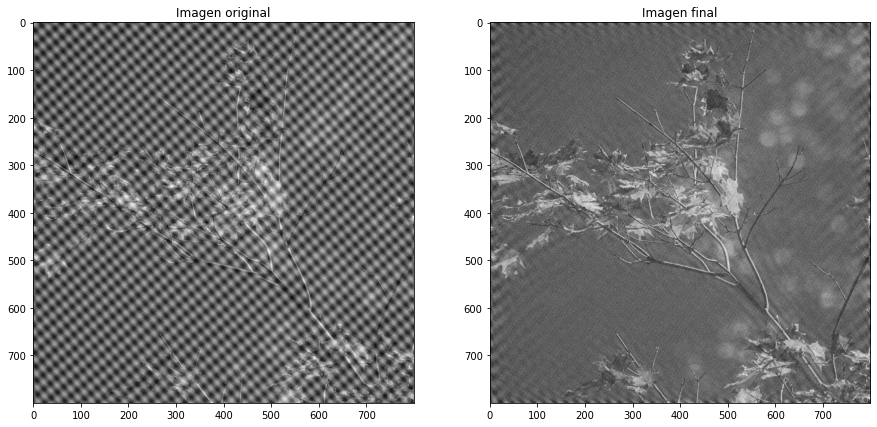

In [163]:
FiltroTarea2('J2.png',
             [pto1Yi,pto1Yd,pto1Xi,pto1Xd],[pto2Yi,pto2Yd,pto2Xi,pto2Xd],
             [pto3Yi,pto3Yd,pto3Xi,pto3Xd],[pto4Yi,pto4Yd,pto4Xi,pto4Xd],
             [pto5Yi,pto5Yd,pto5Xi,pto5Xd],[pto6Yi,pto6Yd,pto6Xi,pto6Xd],
             [pto7Yi,pto7Yd,pto7Xi,pto7Xd],[pto8Yi,pto8Yd,pto8Xi,pto8Xd],
             [pto9Yi,pto9Yd,pto9Xi,pto9Xd],[pto10Yi,pto10Yd,pto10Xi,pto10Xd],
             [pto11Yi,pto11Yd,pto11Xi,pto11Xd],[pto12Yi,pto12Yd,pto12Xi,pto12Xd],
             [pto13Yi,pto13Yd,pto13Xi,pto13Xd],[pto14Yi,pto14Yd,pto14Xi,pto14Xd],
             [pto14Yi,pto14Yd,pto14Xi,pto14Xd],[pto15Yi,pto15Yd,pto15Xi,pto15Xd],
             [pto16Yi,pto16Yd,pto16Xi,pto16Xd],[pto17Yi,pto17Yd,pto17Xi,pto17Xd],
             [pto18Yi,pto18Yd,pto18Xi,pto18Xd],[pto19Yi,pto19Yd,pto19Xi,pto19Xd],
             [pto20Yi,pto20Yd,pto20Xi,pto20Xd],[pto21Yi,pto21Yd,pto21Xi,pto21Xd],
             [pto22Yi,pto22Yd,pto22Xi,pto22Xd])

#### Imagen J3

In [164]:
### Puntos ###
pto1Yi,pto1Yd,pto1Xi,pto1Xd = 395-10,395+10,367-10,367+10
pto2Yi,pto2Yd,pto2Xi,pto2Xd = 405-10,405+10,433-10,433+10
pto3Yi,pto3Yd,pto3Xi,pto3Xd = 415-5,415+5,400-5,400+5
pto4Yi,pto4Yd,pto4Xi,pto4Xd = 385-5,385+5,400-5,400+5
pto5Yi,pto5Yd,pto5Xi,pto5Xd = 270-5,270+5,445-5,445+5
pto6Yi,pto6Yd,pto6Xi,pto6Xd = 530-5,530+5,355-5,355+5
pto7Yi,pto7Yd,pto7Xi,pto7Xd =465-5,465+5,365-5,365+5
pto8Yi,pto8Yd,pto8Xi,pto8Xd =335-5,335+5,435-5,435+5

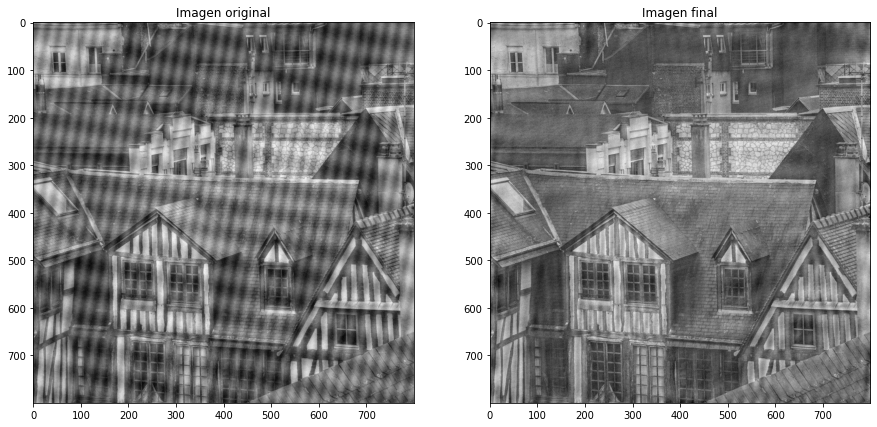

In [165]:
FiltroTarea2('J3.png',
             [pto1Yi,pto1Yd,pto1Xi,pto1Xd],[pto2Yi,pto2Yd,pto2Xi,pto2Xd],
             [pto3Yi,pto3Yd,pto3Xi,pto3Xd],[pto4Yi,pto4Yd,pto4Xi,pto4Xd],
             [pto5Yi,pto5Yd,pto5Xi,pto5Xd],[pto6Yi,pto6Yd,pto6Xi,pto6Xd],
             [pto7Yi,pto7Yd,pto7Xi,pto7Xd],[pto8Yi,pto8Yd,pto8Xi,pto8Xd])

#### Imagen J4

In [166]:
### Puntos ###
pto1Yi,pto1Yd,pto1Xi,pto1Xd = 380-35,380+35,350-2,350+2  
pto2Yi,pto2Yd,pto2Xi,pto2Xd = 380-5,380+5,350-20,350+20 
pto3Yi,pto3Yd,pto3Xi,pto3Xd = 420-35,420+35,450-2,450+2 
pto4Yi,pto4Yd,pto4Xi,pto4Xd = 420-5,420+5,450-20,450+20 
pto5Yi,pto5Yd,pto5Xi,pto5Xd = 450-15,450+15,380-3,380+3 
pto6Yi,pto6Yd,pto6Xi,pto6Xd = 450-3,450+3,380-15,380+15 
pto7Yi,pto7Yd,pto7Xi,pto7Xd = 350-15,350+15,420-3,420+3 
pto8Yi,pto8Yd,pto8Xi,pto8Xd = 350-3,350+3,420-15,420+15
pto9Yi,pto9Yd,pto9Xi,pto9Xd = 430-3,430+3,240-18,240+18  
pto10Yi,pto10Yd,pto10Xi,pto10Xd = 430-18,430+18,240-3,240+3
pto11Yi,pto11Yd,pto11Xi,pto11Xd = 370-3,370+3,560-18,560+18
pto12Yi,pto12Yd,pto12Xi,pto12Xd = 370-18,370+18,560-3,560+3

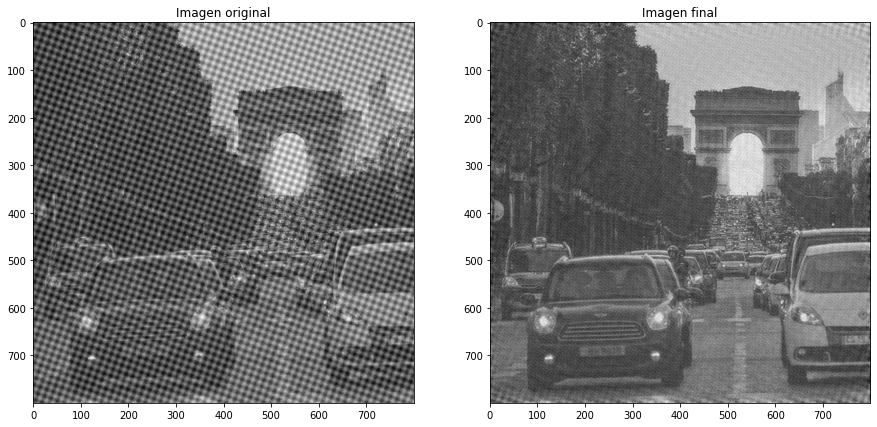

In [167]:
FiltroTarea2('J4.png',
             [pto1Yi,pto1Yd,pto1Xi,pto1Xd],[pto2Yi,pto2Yd,pto2Xi,pto2Xd],
             [pto3Yi,pto3Yd,pto3Xi,pto3Xd],[pto4Yi,pto4Yd,pto4Xi,pto4Xd],
             [pto5Yi,pto5Yd,pto5Xi,pto5Xd],[pto6Yi,pto6Yd,pto6Xi,pto6Xd],
             [pto7Yi,pto7Yd,pto7Xi,pto7Xd],[pto8Yi,pto8Yd,pto8Xi,pto8Xd],
             [pto9Yi,pto9Yd,pto9Xi,pto9Xd],[pto10Yi,pto10Yd,pto10Xi,pto10Xd],
             [pto11Yi,pto11Yd,pto11Xi,pto11Xd],[pto12Yi,pto12Yd,pto12Xi,pto12Xd])

#### Imagen J5

In [168]:
def Normalizar(f):
    faux = np.ravel(f).astype(float)
    minimum = faux.min()
    maximum = faux.max()
    g = (faux-minimum)*(255) / (maximum-minimum)
    r = g.reshape(f.shape).astype(np.uint8)
    return(r)

In [169]:
# Transformada de Fourier
f = np.fft.fft2(J5)

# FFTSHIFT
fshift = np.fft.fftshift(f)

### Hallamos los puntos

dibujar = Normalizar(np.log(np.abs(fshift) + 1))

### Convertimos a 3 canales
dibujar_new = cv2.cvtColor(dibujar,cv2.COLOR_GRAY2RGB)

### Circunferencias concéntricas
for i in range(20,300,20):
    cv2.circle(dibujar_new, (400,400),i+2, (0,0,255), 2)
    
### Hallamos las coordenadas
coordenadas = []
for i in range(dibujar_new.shape[0]): # filas Y
    for j in range(dibujar_new.shape[1]): # columnas X
        if (dibujar_new[i][j] == np.array([0,0,255])).all(): # pixeles dentro de la circunferencia
            xy = []
            xy.insert(0,i-1)
            xy.insert(1,i+1)
            xy.insert(2,j-1)
            xy.insert(3,j+1)
            coordenadas.append(xy)

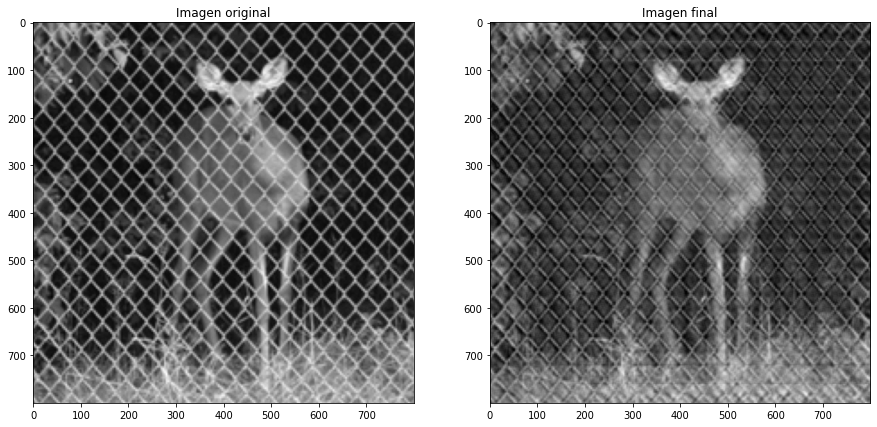

In [170]:
FiltroTarea2('J5.png',coordenadas)